In [2]:
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt

In [48]:
im = Image.open('penny.jpg').rotate(-90, expand=True)
print(im.size)
im = im.crop((600,0,3024,3024-600))
im = ImageOps.grayscale(im)
im2 = ImageOps.invert(im.resize((120,120)))
#im2 = im.resize((120,120))
im3 = im.resize((20,22))
im4 = im.resize((10,11))
a = 255-np.asarray(im2)
a

(3024, 4032)


array([[219, 218, 215, ...,  73,  74,  74],
       [218, 216, 215, ...,  73,  72,  73],
       [216, 214, 213, ...,  77,  72,  71],
       ...,
       [200, 194, 195, ..., 164, 163, 163],
       [199, 194, 195, ..., 164, 163, 164],
       [200, 197, 197, ..., 164, 163, 164]], dtype=uint8)

In [50]:
bins = np.arange(11)
px_vals = bins-1
mn = a.min()
mx = a.max()
out = open("penny.dat","w")
imax = a.shape[0]
jmax = a.shape[1]
for i in range(imax):
    s = ""
    for j in range(jmax):
        px = 9*((a[i,j]-mn)/(mx-mn))
        s += "%d "%(px_vals[np.digitize(px,bins)])
    out.write(s[:-1]+"\n")
out.close()

out = open("contrast_i.dat","w")
imax = a.shape[0]-1
jmax = a.shape[1]
for i in range(imax):
    s = ""
    for j in range(jmax):
        px1 = px_vals[np.digitize(9*((a[i,j]-mn)/(mx-mn)),bins)]
        px2 = px_vals[np.digitize(9*((a[i+1,j]-mn)/(mx-mn)),bins)]
        s += "%d "%(np.abs(px1-px2))
    out.write(s[:-1]+"\n")
out.close()

out = open("contrast_j.dat","w")
imax = a.shape[0]
jmax = a.shape[1]-1
for i in range(imax):
    s = ""
    for j in range(jmax):
        px1 = px_vals[np.digitize(9*((a[i,j]-mn)/(mx-mn)),bins)]
        px2 = px_vals[np.digitize(9*((a[i,j+1]-mn)/(mx-mn)),bins)]
        s += "%d "%(np.abs(px1-px2))
    out.write(s[:-1]+"\n")
out.close()

In [18]:
# x = np.linspace(0,40,1601)
# y = np.linspace(0,66,2476)
x = np.linspace(0,40,320)
y = np.linspace(0,66,495)
xg, yg = np.meshgrid(x,y)

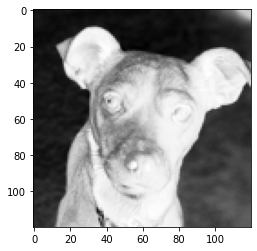

In [49]:
#plt.imshow(ImageOps.invert(im2), cmap="Greys_r")
plt.imshow(im2, cmap="Greys_r")
#plt.scatter(xg,yg)
plt.show()